In [1]:
# Rock-Paper-Scissors Dataset Exploration
# ML Project A.Y. 2024/25

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 1. DATASET OVERVIEW


In [5]:
# Define paths
data_path = '../data'
classes = ['rock', 'paper', 'scissors']

print("\n1. DATASET OVERVIEW")
print("-" * 30)

# Count images per class
class_counts = {}
total_images = 0

for class_name in classes:
    class_path = os.path.join(data_path, class_name)
    if os.path.exists(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name.capitalize()}: {count} images")

print(f"\nTotal images: {total_images}")
print(f"Average per class: {total_images/len(classes):.1f}")


1. DATASET OVERVIEW
------------------------------
Rock: 726 images
Paper: 712 images
Scissors: 750 images

Total images: 2188
Average per class: 729.3


In [6]:
# Class distribution analysis
print(f"\nClass Balance Analysis:")
min_count = min(class_counts.values())
max_count = max(class_counts.values())
print(f"Min class size: {min_count}")
print(f"Max class size: {max_count}")
print(f"Imbalance ratio: {max_count/min_count:.2f}")


Class Balance Analysis:
Min class size: 712
Max class size: 750
Imbalance ratio: 1.05


## 2. VISUALIZE CLASS DISTRIBUTION


2. CLASS DISTRIBUTION VISUALIZATION
----------------------------------------


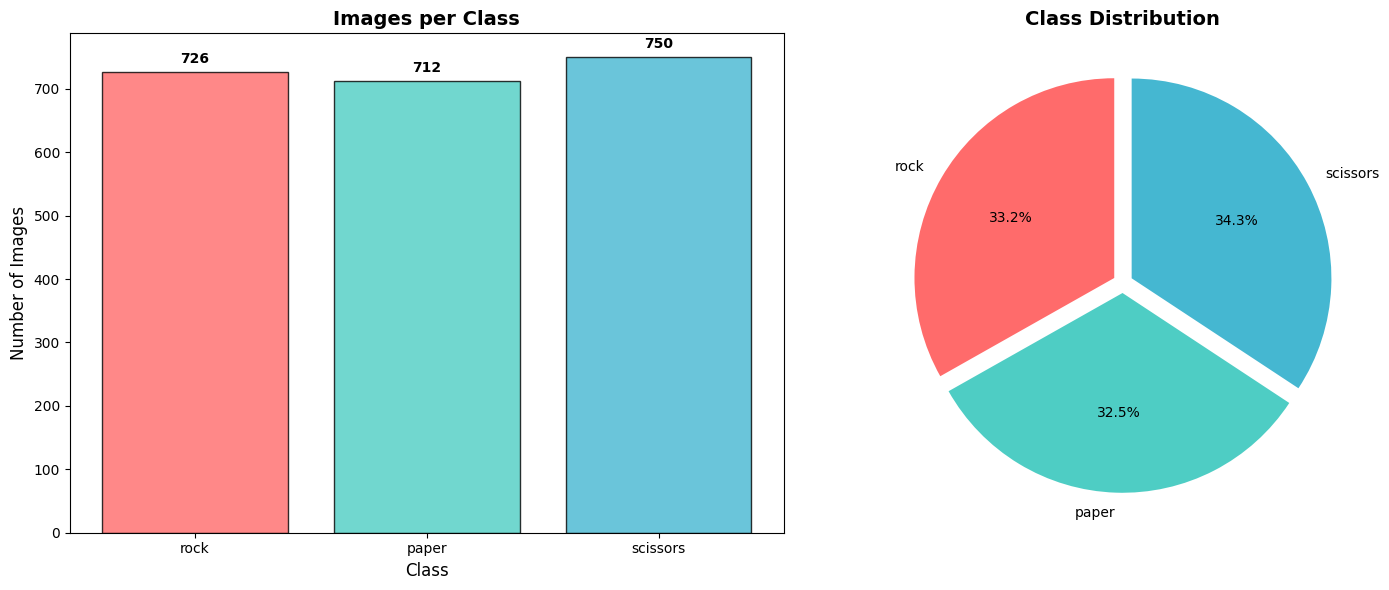

In [7]:
print("\n2. CLASS DISTRIBUTION VISUALIZATION")
print("-" * 40)

# Create distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
classes_list = list(class_counts.keys())
counts_list = list(class_counts.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(classes_list, counts_list, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Images per Class', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.set_xlabel('Class', fontsize=12)

# Add value labels on bars
for bar, count in zip(bars, counts_list):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{count}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(counts_list, labels=classes_list, colors=colors, autopct='%1.1f%%', 
        startangle=90, explode=(0.05, 0.05, 0.05))
ax2.set_title('Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 3. IMAGE PROPERTIES ANALYSIS

In [8]:
print("\n3. IMAGE PROPERTIES ANALYSIS")
print("-" * 35)

# Function to analyze image properties
def analyze_image_properties(data_path, classes, sample_size=50):
    properties = {
        'width': [],
        'height': [],
        'channels': [],
        'file_size': [],
        'class': []
    }
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            # Sample files for analysis
            sample_files = np.random.choice(files, min(sample_size, len(files)), replace=False)
            
            for file_name in sample_files:
                file_path = os.path.join(class_path, file_name)
                try:
                    # Load image
                    img = Image.open(file_path)
                    img_array = np.array(img)
                    
                    # Get properties
                    properties['width'].append(img_array.shape[1])
                    properties['height'].append(img_array.shape[0])
                    properties['channels'].append(img_array.shape[2] if len(img_array.shape) > 2 else 1)
                    properties['file_size'].append(os.path.getsize(file_path))
                    properties['class'].append(class_name)
                    
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue
    
    return pd.DataFrame(properties)

# Analyze properties
print("Analyzing image properties (sampling 50 images per class)...")
df_properties = analyze_image_properties(data_path, classes)

# Display statistics
print("\nImage Properties Statistics:")
print(df_properties.groupby('class')[['width', 'height', 'channels', 'file_size']].describe())

# Check for consistency
print(f"\nConsistency Check:")
print(f"Unique widths: {df_properties['width'].nunique()}")
print(f"Unique heights: {df_properties['height'].nunique()}")
print(f"Unique channels: {df_properties['channels'].nunique()}")

if df_properties['width'].nunique() == 1 and df_properties['height'].nunique() == 1:
    print("✓ All images have consistent dimensions")
else:
    print("⚠ Images have varying dimensions")


3. IMAGE PROPERTIES ANALYSIS
-----------------------------------
Analyzing image properties (sampling 50 images per class)...

Image Properties Statistics:
         width                                                height         \
         count   mean  std    min    25%    50%    75%    max  count   mean   
class                                                                         
paper     50.0  300.0  0.0  300.0  300.0  300.0  300.0  300.0   50.0  200.0   
rock      50.0  300.0  0.0  300.0  300.0  300.0  300.0  300.0   50.0  200.0   
scissors  50.0  300.0  0.0  300.0  300.0  300.0  300.0  300.0   50.0  200.0   

          ... channels      file_size                                  \
          ...      75%  max     count      mean          std      min   
class     ...                                                           
paper     ...      3.0  3.0      50.0  77328.80  7756.506580  58903.0   
rock      ...      3.0  3.0      50.0  76327.72  8132.677055  54711.0   
sci

## 4. SAMPLE IMAGES VISUALIZATION


4. SAMPLE IMAGES VISUALIZATION
-----------------------------------


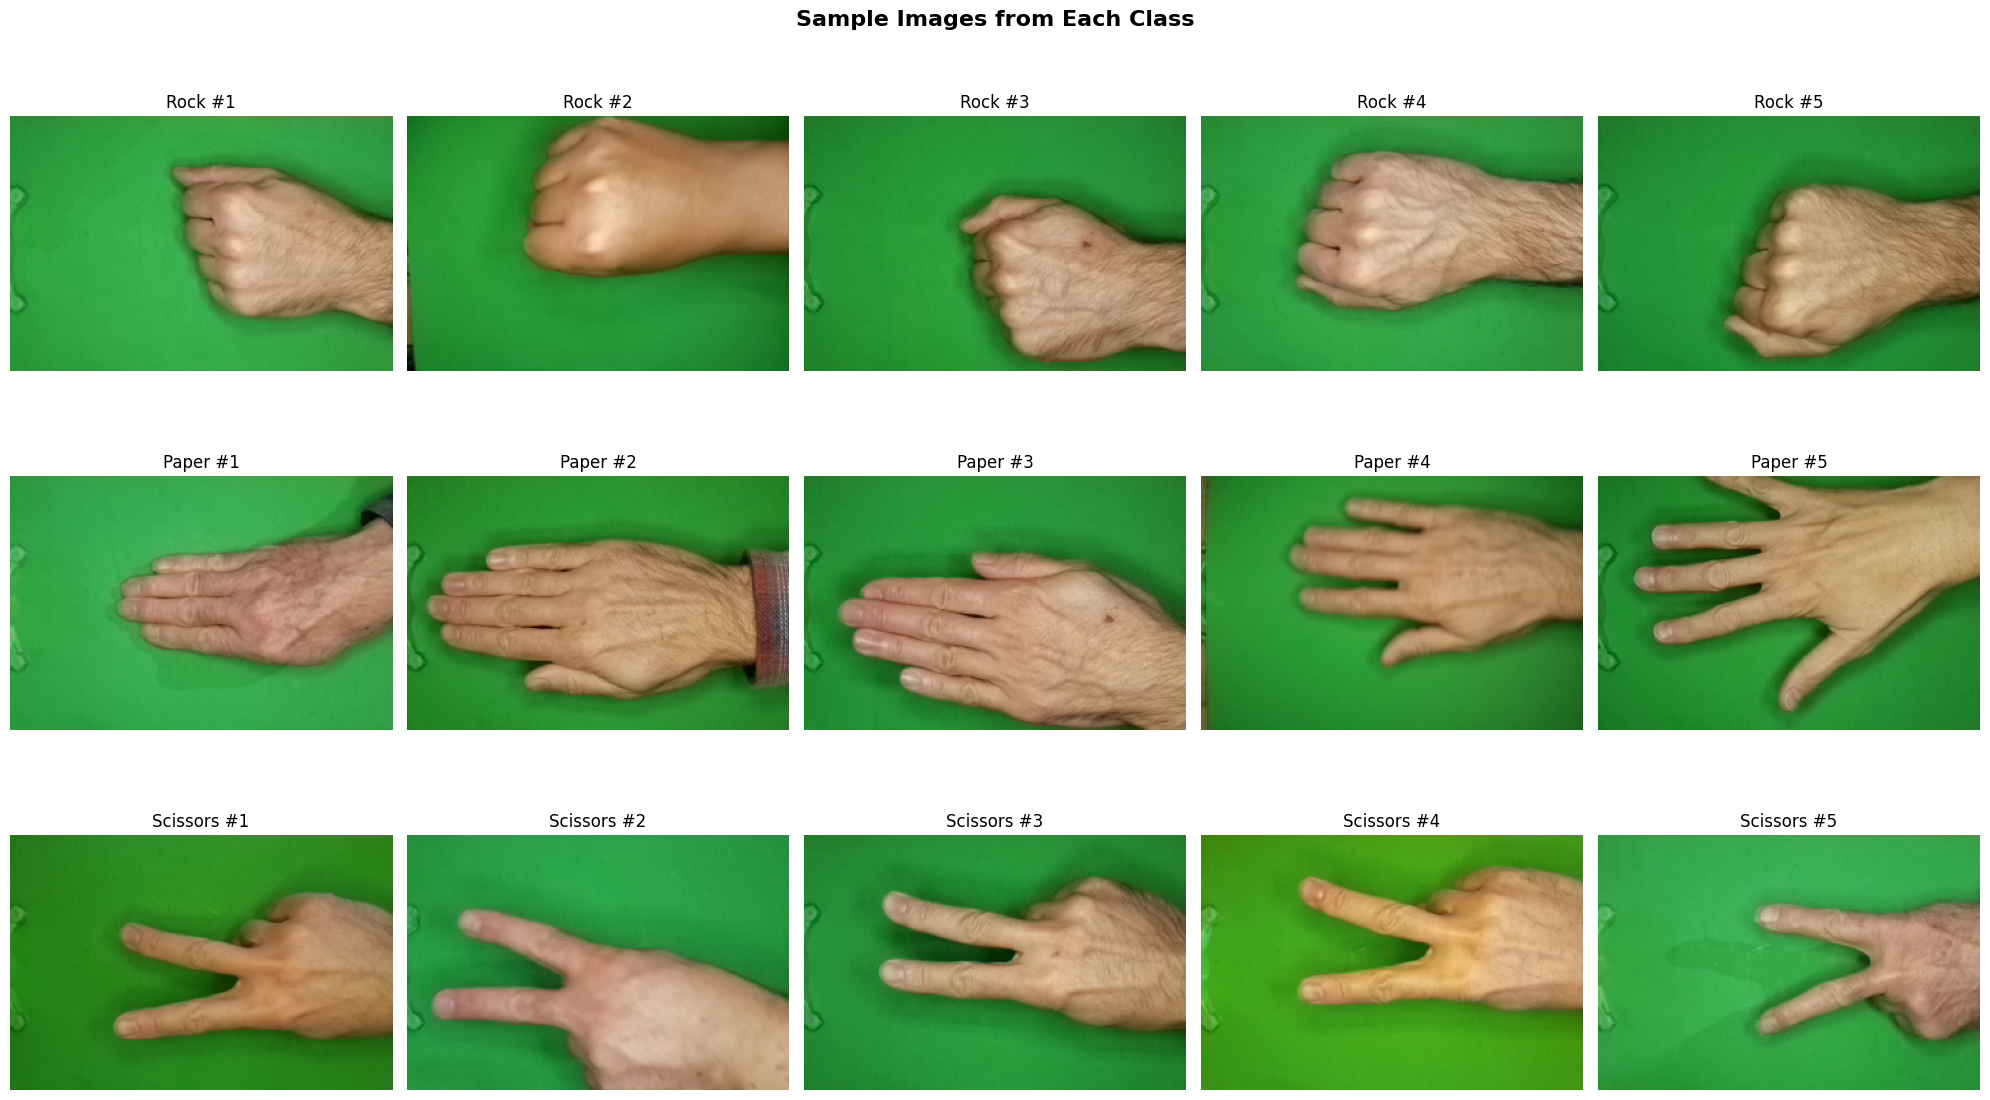

In [9]:
print("\n4. SAMPLE IMAGES VISUALIZATION")
print("-" * 35)

def load_sample_images(data_path, classes, n_samples=5):
    """Load sample images from each class"""
    samples = {}
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sample_files = np.random.choice(files, min(n_samples, len(files)), replace=False)
            
            images = []
            for file_name in sample_files:
                file_path = os.path.join(class_path, file_name)
                try:
                    img = Image.open(file_path)
                    images.append(np.array(img))
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue
            
            samples[class_name] = images
    
    return samples

# Load samples
sample_images = load_sample_images(data_path, classes)

# Display sample images
fig, axes = plt.subplots(len(classes), 5, figsize=(20, 12))
fig.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold')

for i, class_name in enumerate(classes):
    for j, img in enumerate(sample_images[class_name][:5]):
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{class_name.capitalize()} #{j+1}', fontsize=12)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


## 5. PIXEL INTENSITY ANALYSIS


5. PIXEL INTENSITY ANALYSIS
--------------------------------
Analyzing pixel intensities...


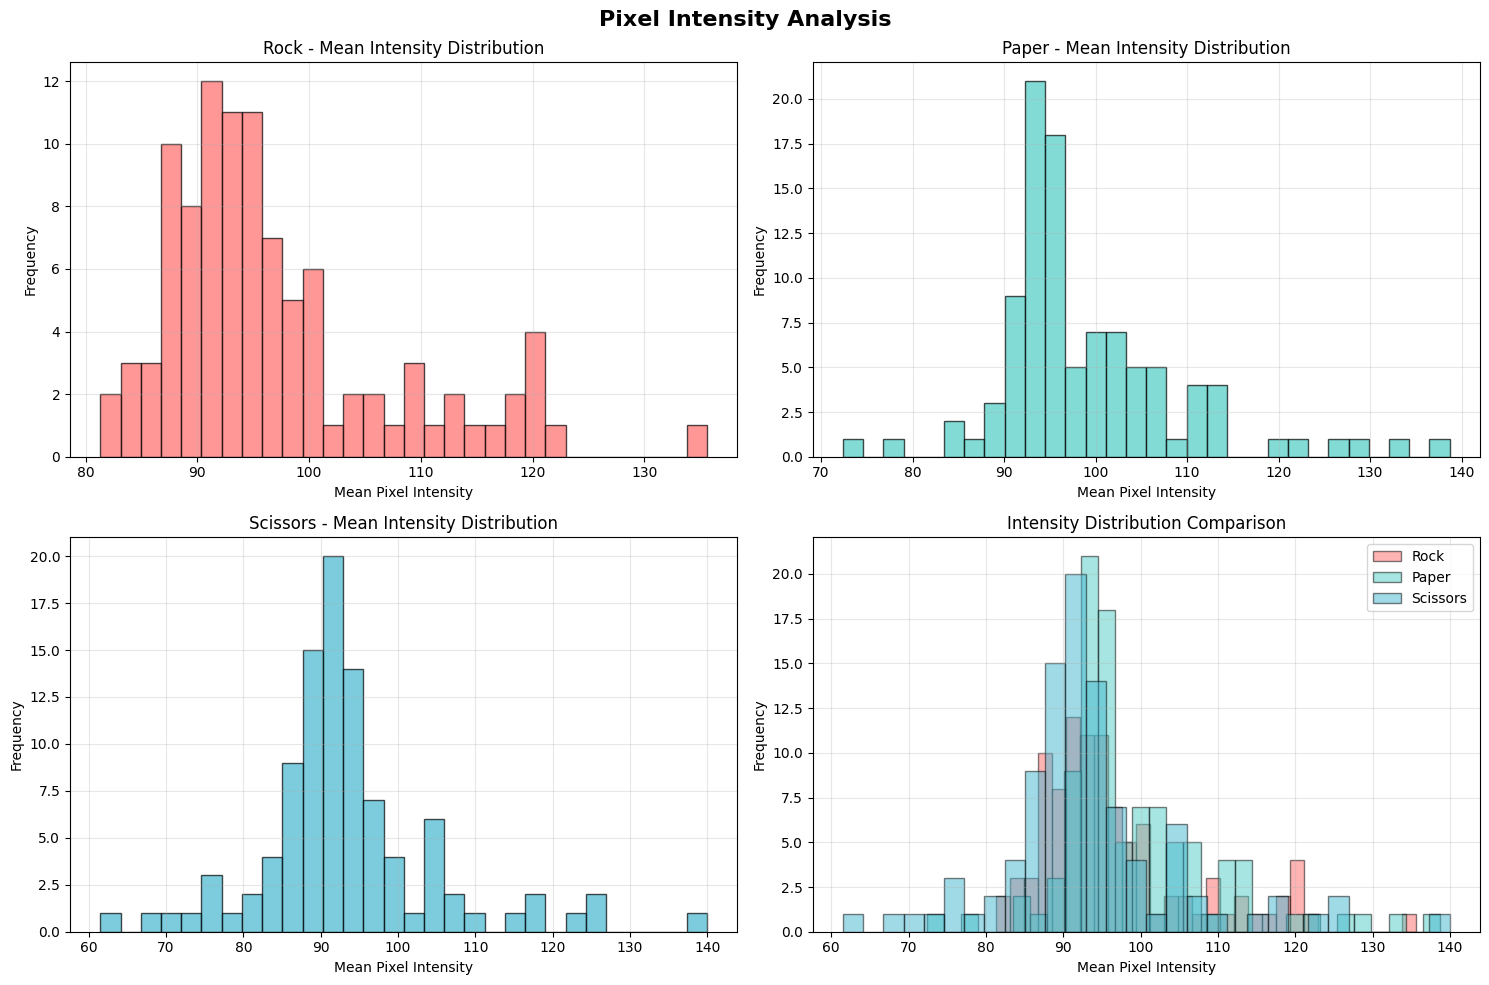


Pixel Intensity Statistics:
Rock: Mean=97.02, Std=10.41
Paper: Mean=99.17, Std=10.36
Scissors: Mean=93.32, Std=11.70


In [10]:
print("\n5. PIXEL INTENSITY ANALYSIS")
print("-" * 32)

def analyze_pixel_intensities(data_path, classes, sample_size=100):
    """Analyze pixel intensity distributions"""
    intensities = {}
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sample_files = np.random.choice(files, min(sample_size, len(files)), replace=False)
            
            class_intensities = []
            for file_name in sample_files:
                file_path = os.path.join(class_path, file_name)
                try:
                    img = cv2.imread(file_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Calculate mean intensity across all channels
                    mean_intensity = np.mean(img_rgb)
                    class_intensities.append(mean_intensity)
                except Exception as e:
                    continue
            
            intensities[class_name] = class_intensities
    
    return intensities

# Analyze intensities
print("Analyzing pixel intensities...")
intensities = analyze_pixel_intensities(data_path, classes)

# Plot intensity distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Pixel Intensity Analysis', fontsize=16, fontweight='bold')

# Individual histograms
for i, class_name in enumerate(classes):
    ax = axes[i//2, i%2]
    ax.hist(intensities[class_name], bins=30, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'{class_name.capitalize()} - Mean Intensity Distribution')
    ax.set_xlabel('Mean Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# Combined comparison
ax = axes[1, 1]
for i, class_name in enumerate(classes):
    ax.hist(intensities[class_name], bins=30, alpha=0.5, label=class_name.capitalize(), 
            color=colors[i], edgecolor='black')
ax.set_title('Intensity Distribution Comparison')
ax.set_xlabel('Mean Pixel Intensity')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print intensity statistics
print("\nPixel Intensity Statistics:")
for class_name in classes:
    mean_int = np.mean(intensities[class_name])
    std_int = np.std(intensities[class_name])
    print(f"{class_name.capitalize()}: Mean={mean_int:.2f}, Std={std_int:.2f}")

## 6. COLOR CHANNEL ANALYSIS


6. COLOR CHANNEL ANALYSIS
------------------------------
Analyzing color channels...


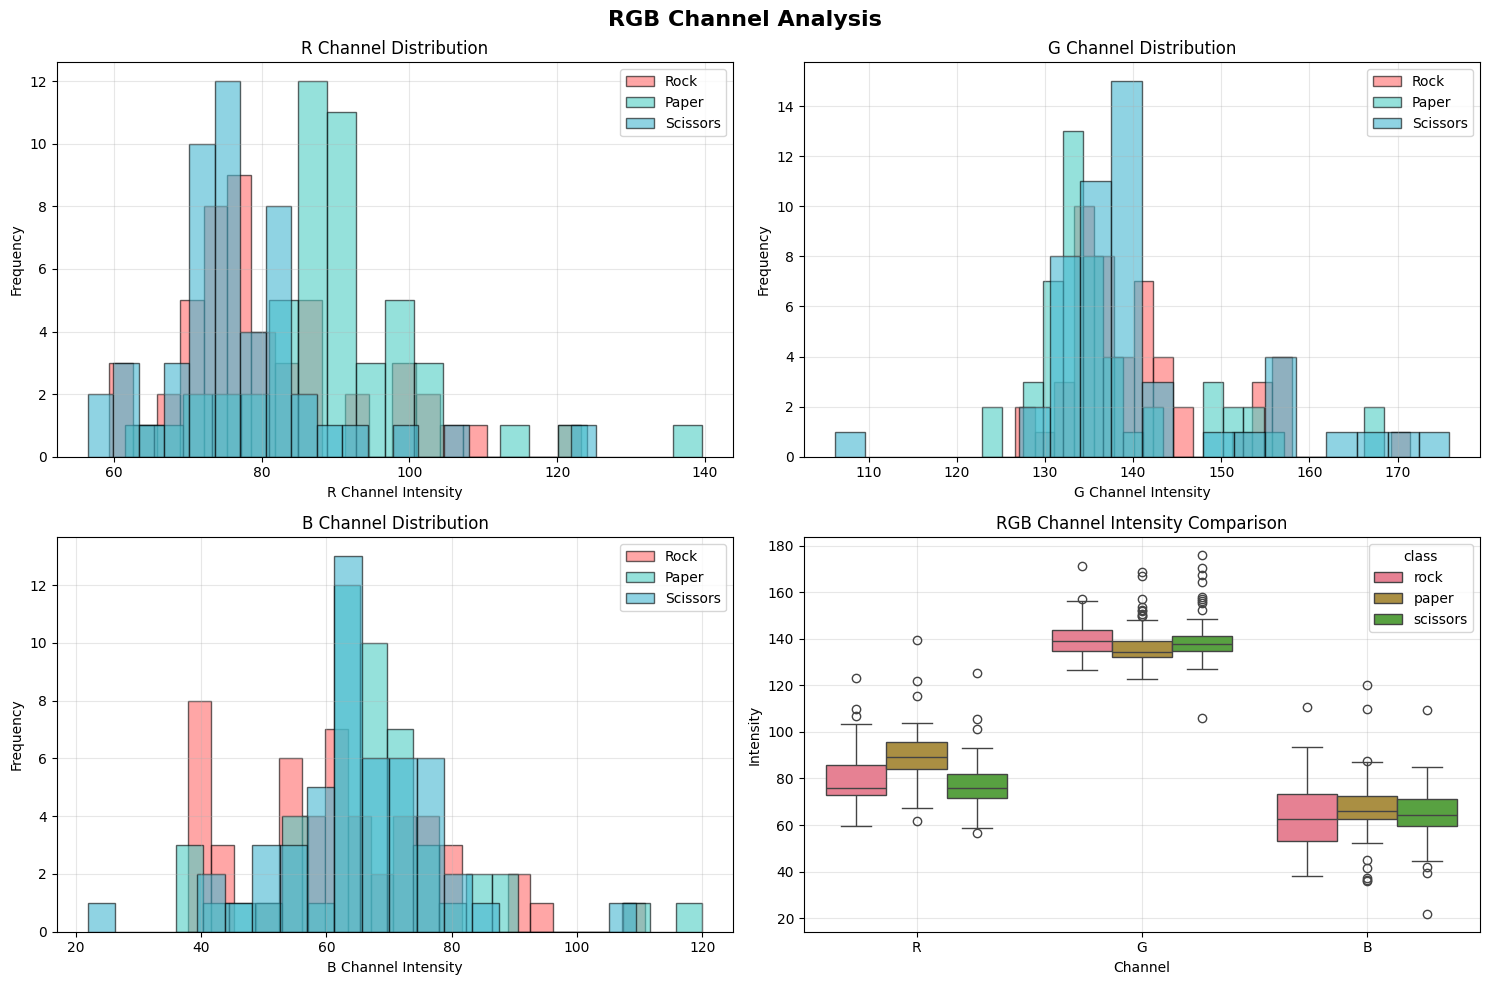


RGB Channel Statistics by Class:
             R                                                         \
         count       mean        std        min        25%        50%   
class                                                                   
paper     50.0  89.877535  13.018720  61.541433  84.165679  89.103667   
rock      50.0  80.667975  13.572620  59.431100  73.092346  76.111233   
scissors  50.0  77.222276  11.583558  56.474133  71.659533  75.863850   

                                    G              ...              \
                75%         max count        mean  ...         75%   
class                                              ...               
paper     95.784342  139.628583  50.0  137.689155  ...  138.989179   
rock      85.908817  123.229283  50.0  140.957167  ...  143.667287   
scissors  81.735667  125.310350  50.0  140.372230  ...  141.064312   

                         B                                            \
                 max count       m

In [11]:
print("\n6. COLOR CHANNEL ANALYSIS")
print("-" * 30)

def analyze_color_channels(data_path, classes, sample_size=50):
    """Analyze RGB channel distributions"""
    channel_data = {'class': [], 'R': [], 'G': [], 'B': []}
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sample_files = np.random.choice(files, min(sample_size, len(files)), replace=False)
            
            for file_name in sample_files:
                file_path = os.path.join(class_path, file_name)
                try:
                    img = cv2.imread(file_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
                    # Calculate mean for each channel
                    mean_r = np.mean(img_rgb[:, :, 0])
                    mean_g = np.mean(img_rgb[:, :, 1])
                    mean_b = np.mean(img_rgb[:, :, 2])
                    
                    channel_data['class'].append(class_name)
                    channel_data['R'].append(mean_r)
                    channel_data['G'].append(mean_g)
                    channel_data['B'].append(mean_b)
                    
                except Exception as e:
                    continue
    
    return pd.DataFrame(channel_data)

# Analyze color channels
print("Analyzing color channels...")
df_channels = analyze_color_channels(data_path, classes)

# Plot channel distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('RGB Channel Analysis', fontsize=16, fontweight='bold')

channels = ['R', 'G', 'B']
channel_colors = ['red', 'green', 'blue']

for i, channel in enumerate(channels):
    ax = axes[i//2, i%2]
    for j, class_name in enumerate(classes):
        class_data = df_channels[df_channels['class'] == class_name][channel]
        ax.hist(class_data, bins=20, alpha=0.6, label=class_name.capitalize(), 
                color=colors[j], edgecolor='black')
    
    ax.set_title(f'{channel} Channel Distribution')
    ax.set_xlabel(f'{channel} Channel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Channel comparison boxplot
ax = axes[1, 1]
df_melted = df_channels.melt(id_vars=['class'], value_vars=['R', 'G', 'B'], 
                             var_name='Channel', value_name='Intensity')
sns.boxplot(data=df_melted, x='Channel', y='Intensity', hue='class', ax=ax)
ax.set_title('RGB Channel Intensity Comparison')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print channel statistics
print("\nRGB Channel Statistics by Class:")
print(df_channels.groupby('class')[['R', 'G', 'B']].describe())

## 7. Summary and Recommendations

### Dataset Summary
- **Total images**: 2,188  
- **Classes**: 3 (Rock, Paper, Scissors)  
- **Class balance**: Good (max difference: ~40 images)  
- **Image format**: PNG, RGB, 300x200 pixels  
- **Background**: Consistent green background  

### Key Observations
- All images have consistent dimensions (300x200)  
- Dataset is well-balanced across classes  
- Images have consistent lighting and background  
- RGB channels show similar distributions across classes  

### Recommendations for Preprocessing
- **Normalize** pixel values to [0, 1] range  
- **Data augmentation**: rotation, flip, brightness variations  
- **Stratified splitting** to maintain class balance  
- **Green background removal** might improve generalization  
- **Resizing** to common CNN input sizes (224x224, 128x128)  

### Next Steps
✅ **Completed**: Data exploration and analysis  
📋 **Next**: Implement preprocessing pipeline  
📋 **Then**: Design data augmentation strategy  
📋 **Then**: Split data into train/validation/test sets  
📋 **Then**: Design CNN architectures  